In [2]:
import numpy as np

In [9]:
Q = np.matrix(
        [[ 0.9  , 0.075 , 0.025 ],
        [  0.15 , 0.8   , 0.05  ],
        [  0.25 , 0.25  , 0.5   ]]
    )
states = [
        [[1, 0, 0]],
        [[0, 1, 0]],
        [[0, 0, 1]]
    ]

for init_s in states:
    epsilon = 1
    while epsilon > 10e-9:
        next_s = np.dot(init_s ,Q)
        epsilon = np.sqrt(np.sum(np.square(next_s - init_s)))
        init_s = next_s
    print(init_s)

[[0.62500002 0.31249998 0.0625    ]]
[[0.62499998 0.31250002 0.0625    ]]
[[0.62499998 0.31250002 0.0625    ]]


3.08


/tmp/ipykernel_4117459/964893186.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


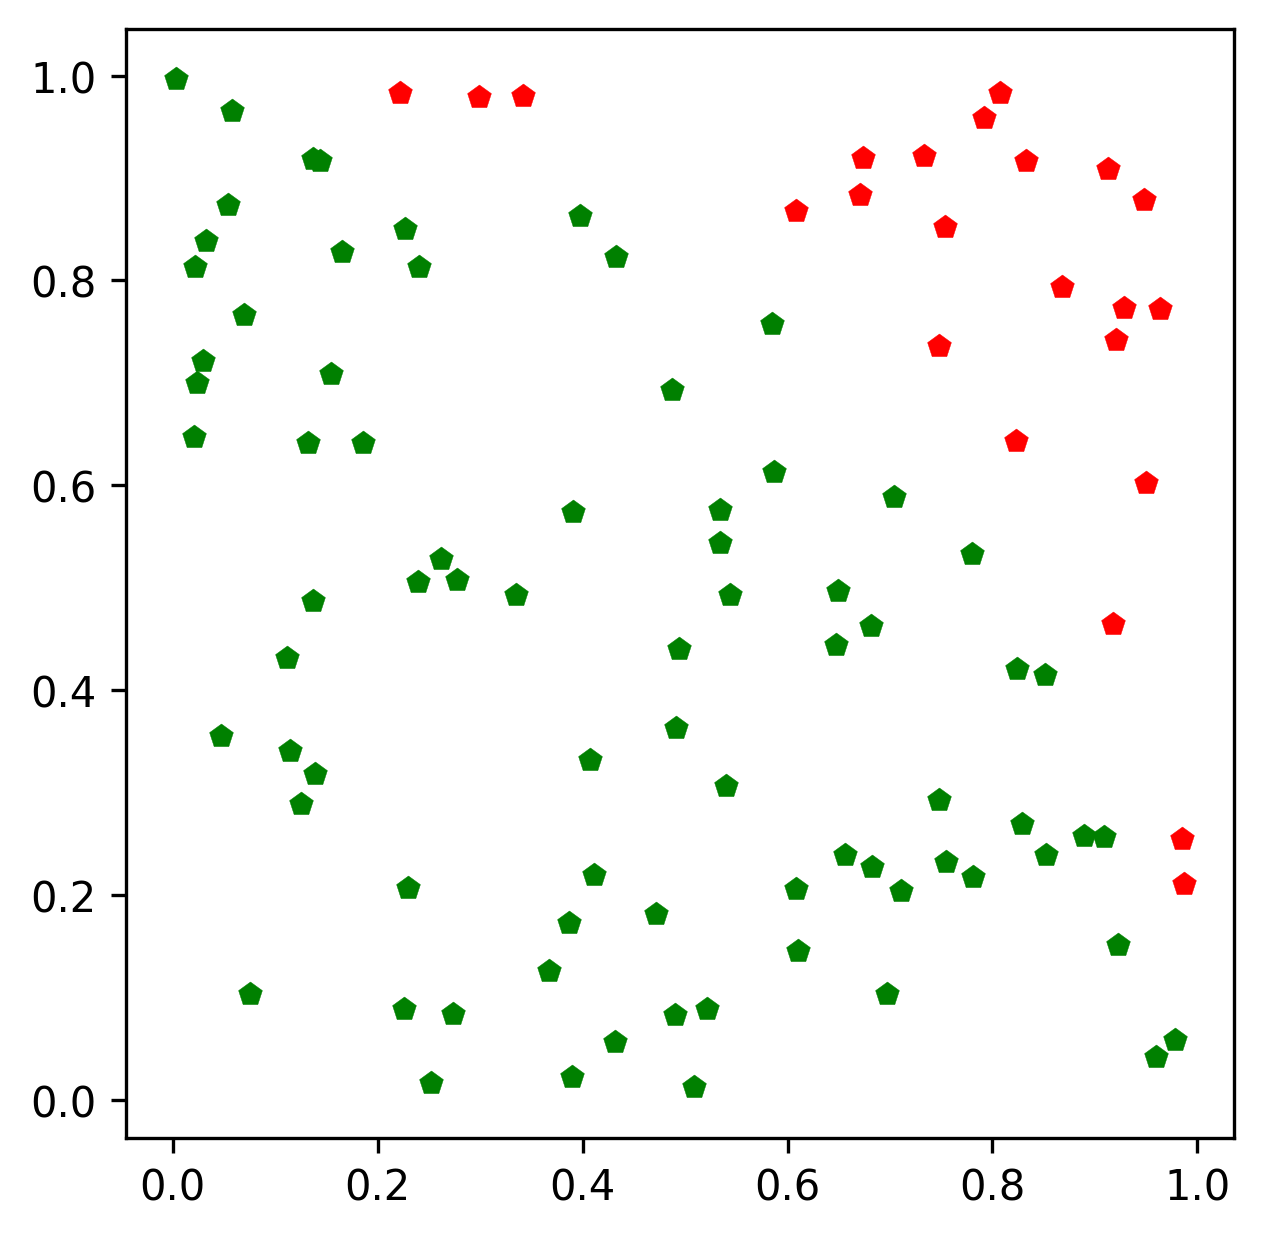

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
from random import random

inside = 0
n = 10**2

x_inside = []
y_inside = []
x_outside = []
y_outside = []

for _ in range(n):
    x = random()
    y = random()
    if x**2 + y**2 <= 1:
        inside += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

pi = 4*inside/n
print(pi)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_inside, y_inside, color='g', marker='p', linewidth=0.1)
ax.scatter(x_outside, y_outside, color='r', marker='p', linewidth=0.1)
fig.show()

3.204


/tmp/ipykernel_4117459/1622821911.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


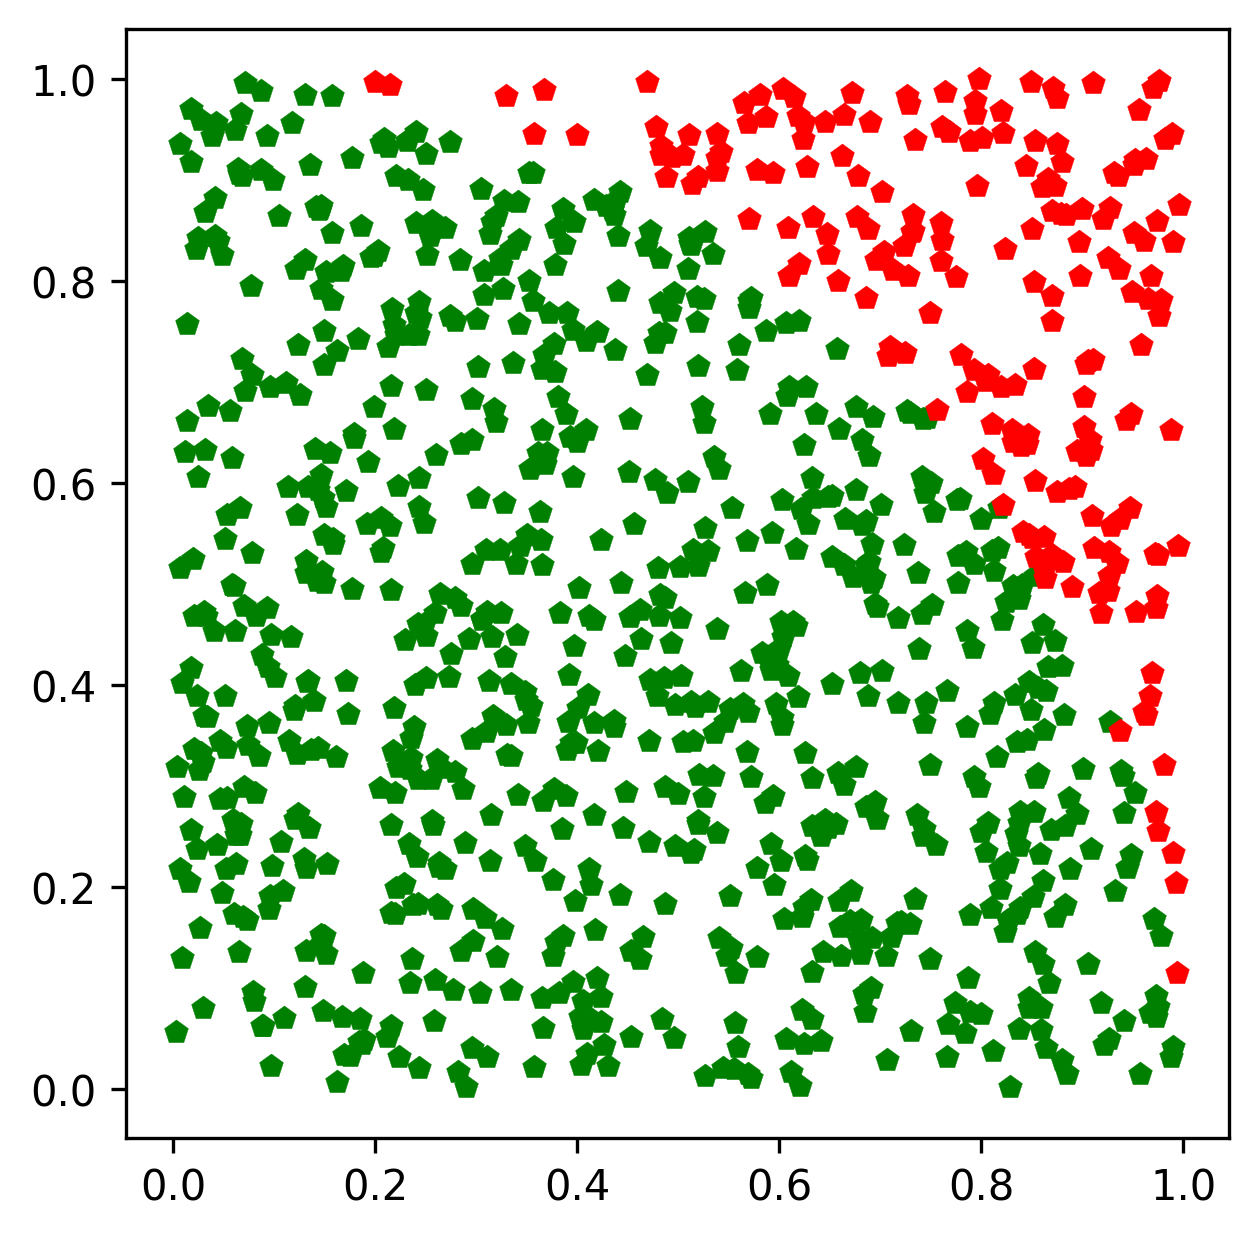

In [32]:
inside = 0
n = 10**3

x_inside = []
y_inside = []
x_outside = []
y_outside = []

for _ in range(n):
    x = random()
    y = random()
    if x**2 + y**2 <= 1:
        inside += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

pi = 4*inside/n
print(pi)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_inside, y_inside, color='g', marker='p', linewidth=0.1)
ax.scatter(x_outside, y_outside, color='r', marker='p', linewidth=0.1)
fig.show()

3.1412


/tmp/ipykernel_4117459/2715375261.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


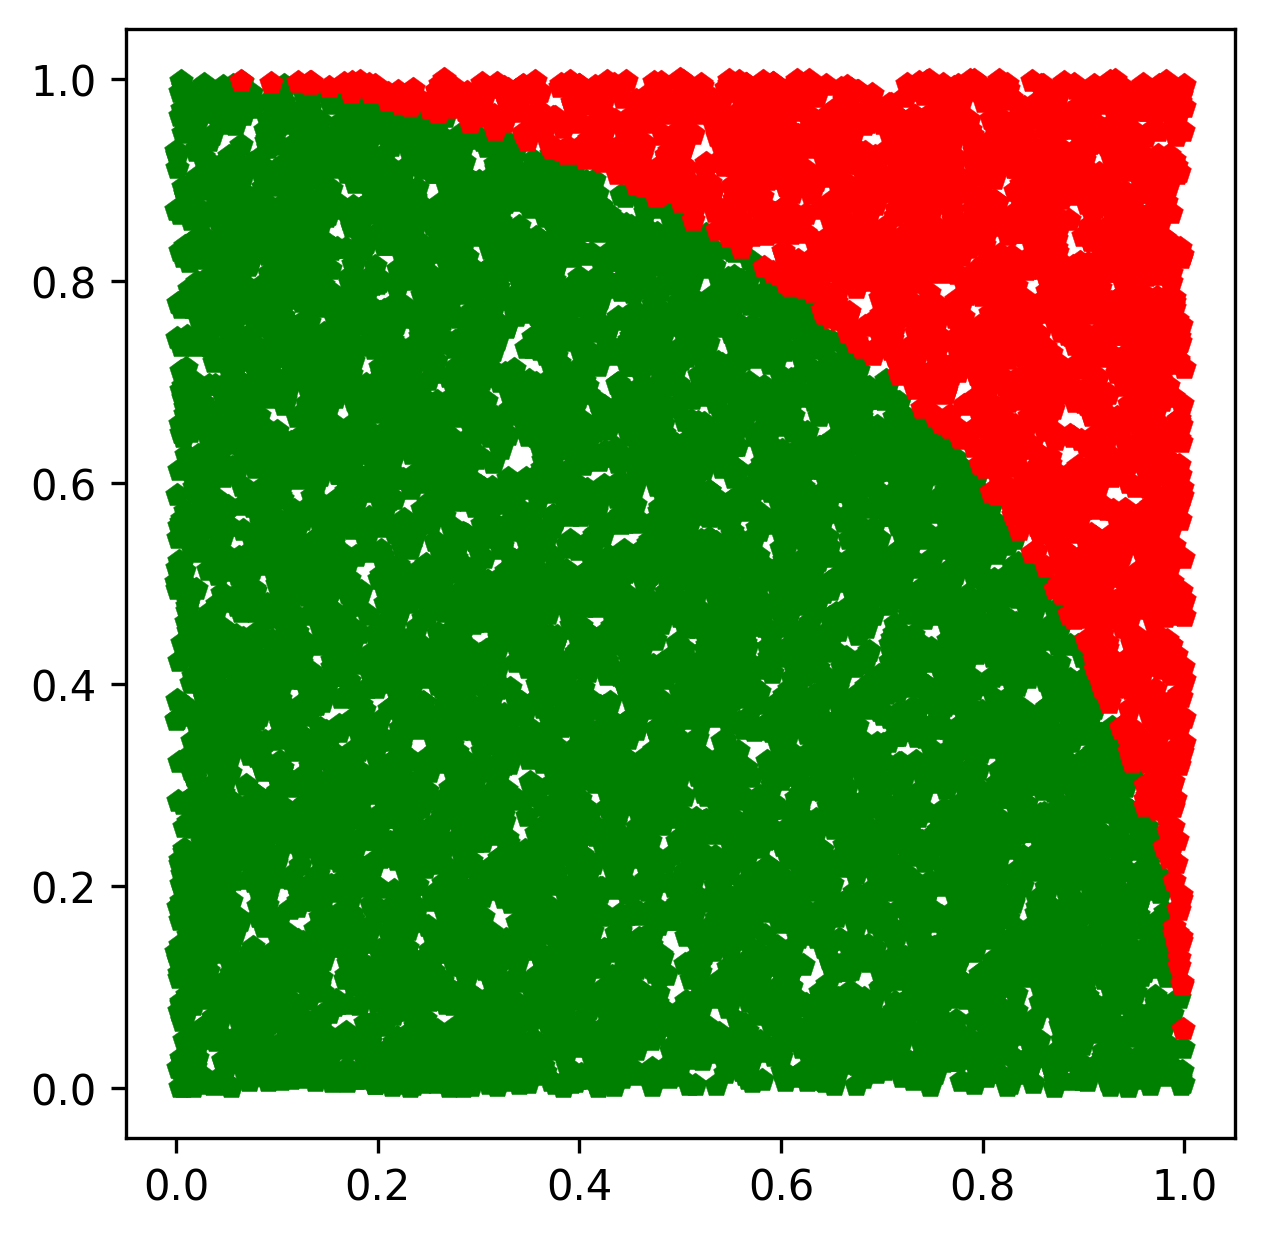

In [30]:
inside = 0
n = 10**4

x_inside = []
y_inside = []
x_outside = []
y_outside = []

for _ in range(n):
    x = random()
    y = random()
    if x**2 + y**2 <= 1:
        inside += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

pi = 4*inside/n
print(pi)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_inside, y_inside, color='g', marker='p', linewidth=0.1)
ax.scatter(x_outside, y_outside, color='r', marker='p', linewidth=0.1)
fig.show()

In [11]:
import random

# Lets define our Beta Function to generate s for any particular state. We don't care for the normalizing constant here.

def beta_s(w,a,b):

	return w**(a-1)*(1-w)**(b-1)

# This Function returns True if the coin with probability P of heads comes heads when flipped.

def random_coin(p):

	unif = random.uniform(0,1)

	if unif>=p:
		return False
	else:
		return True


# This Function runs the MCMC chain for Beta Distribution.

def beta_mcmc(N_hops,a,b):

	states = []

	cur = random.uniform(0,1)

	for i in range(0,N_hops):
		states.append(cur)
		next = random.uniform(0,1)
		ap = min(beta_s(next,a,b)/beta_s(cur,a,b),1) # Calculate the acceptance probability
		if random_coin(ap):
			cur = next

	return states[-1000:] # Returns the last 100 states of the chain

/tmp/ipykernel_947698/1673982407.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  e4 = i ** (a - 1)
/tmp/ipykernel_947698/1673982407.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  e5 = (1 - i) ** (b - 1)


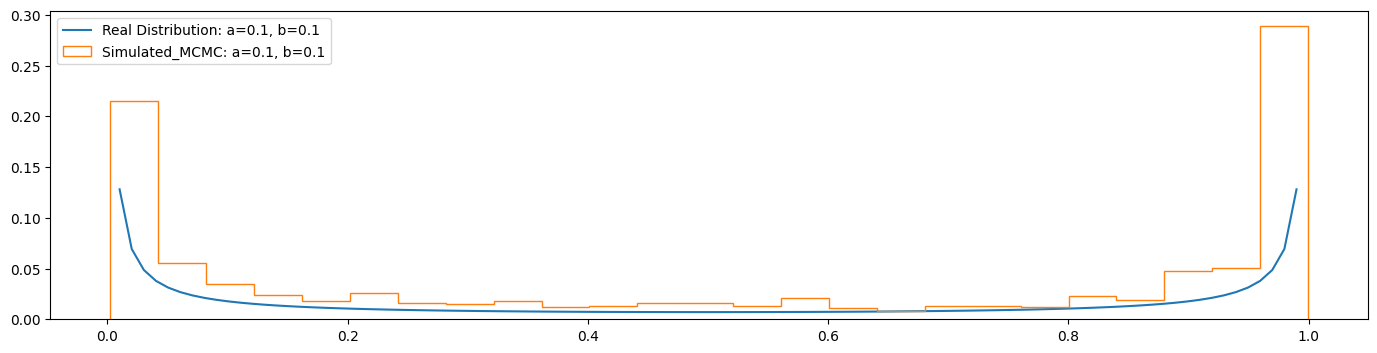

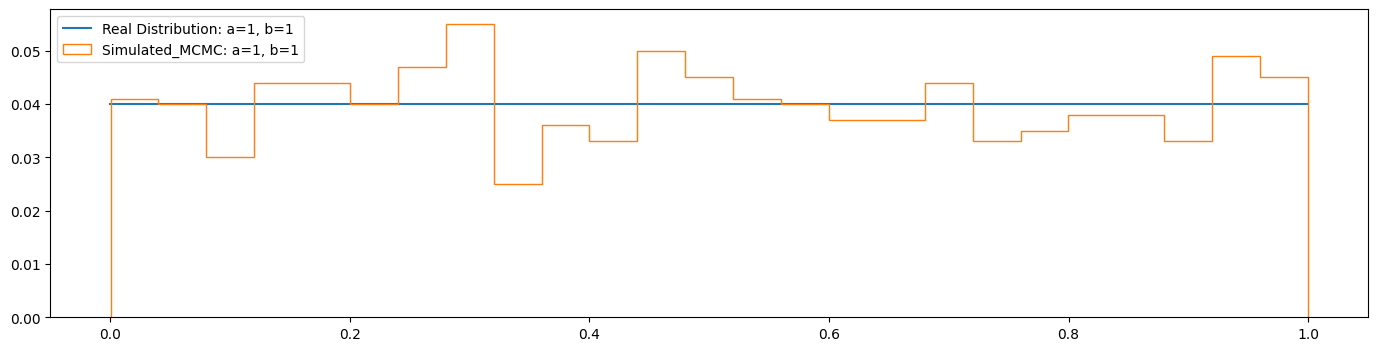

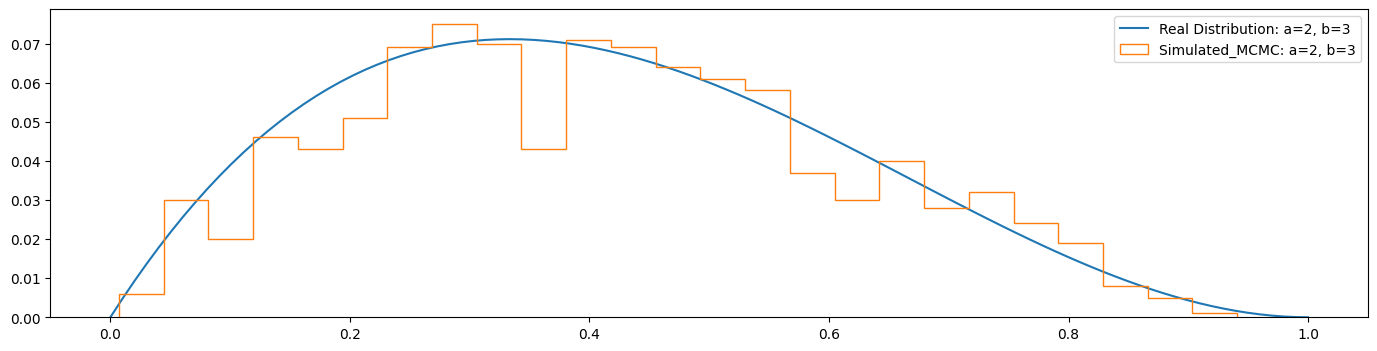

In [13]:
import numpy as np

import pylab as pl

import scipy.special as ss

%matplotlib inline

pl.rcParams['figure.figsize'] = (17.0, 4.0)

# Actual Beta PDF.

def beta(a, b, i):
	e1 = ss.gamma(a + b)
	e2 = ss.gamma(a)
	e3 = ss.gamma(b)
	e4 = i ** (a - 1)
	e5 = (1 - i) ** (b - 1)

	return (e1/(e2*e3)) * e4 * e5

# Create a function to plot Actual Beta PDF with the Beta Sampled from MCMC Chain.

def plot_beta(a, b):

	Ly = []
	Lx = []

	i_list = np.mgrid[0:1:100j]

	for i in i_list:
		Lx.append(i)
		Ly.append(beta(a, b, i))

	pl.plot(Lx, np.array(Ly) * 1.0/len(Ly) * 4, label="Real Distribution: a="+str(a)+", b="+str(b))
	bmcmc = beta_mcmc(100000,a,b)
	pl.hist(bmcmc, weights=np.repeat(1.0/len(bmcmc), len(bmcmc)),bins =25, histtype='step',label="Simulated_MCMC: a="+str(a)+", b="+str(b))
	pl.legend()
	pl.show()

	

plot_beta(0.1, 0.1)

plot_beta(1, 1)

plot_beta(2, 3)

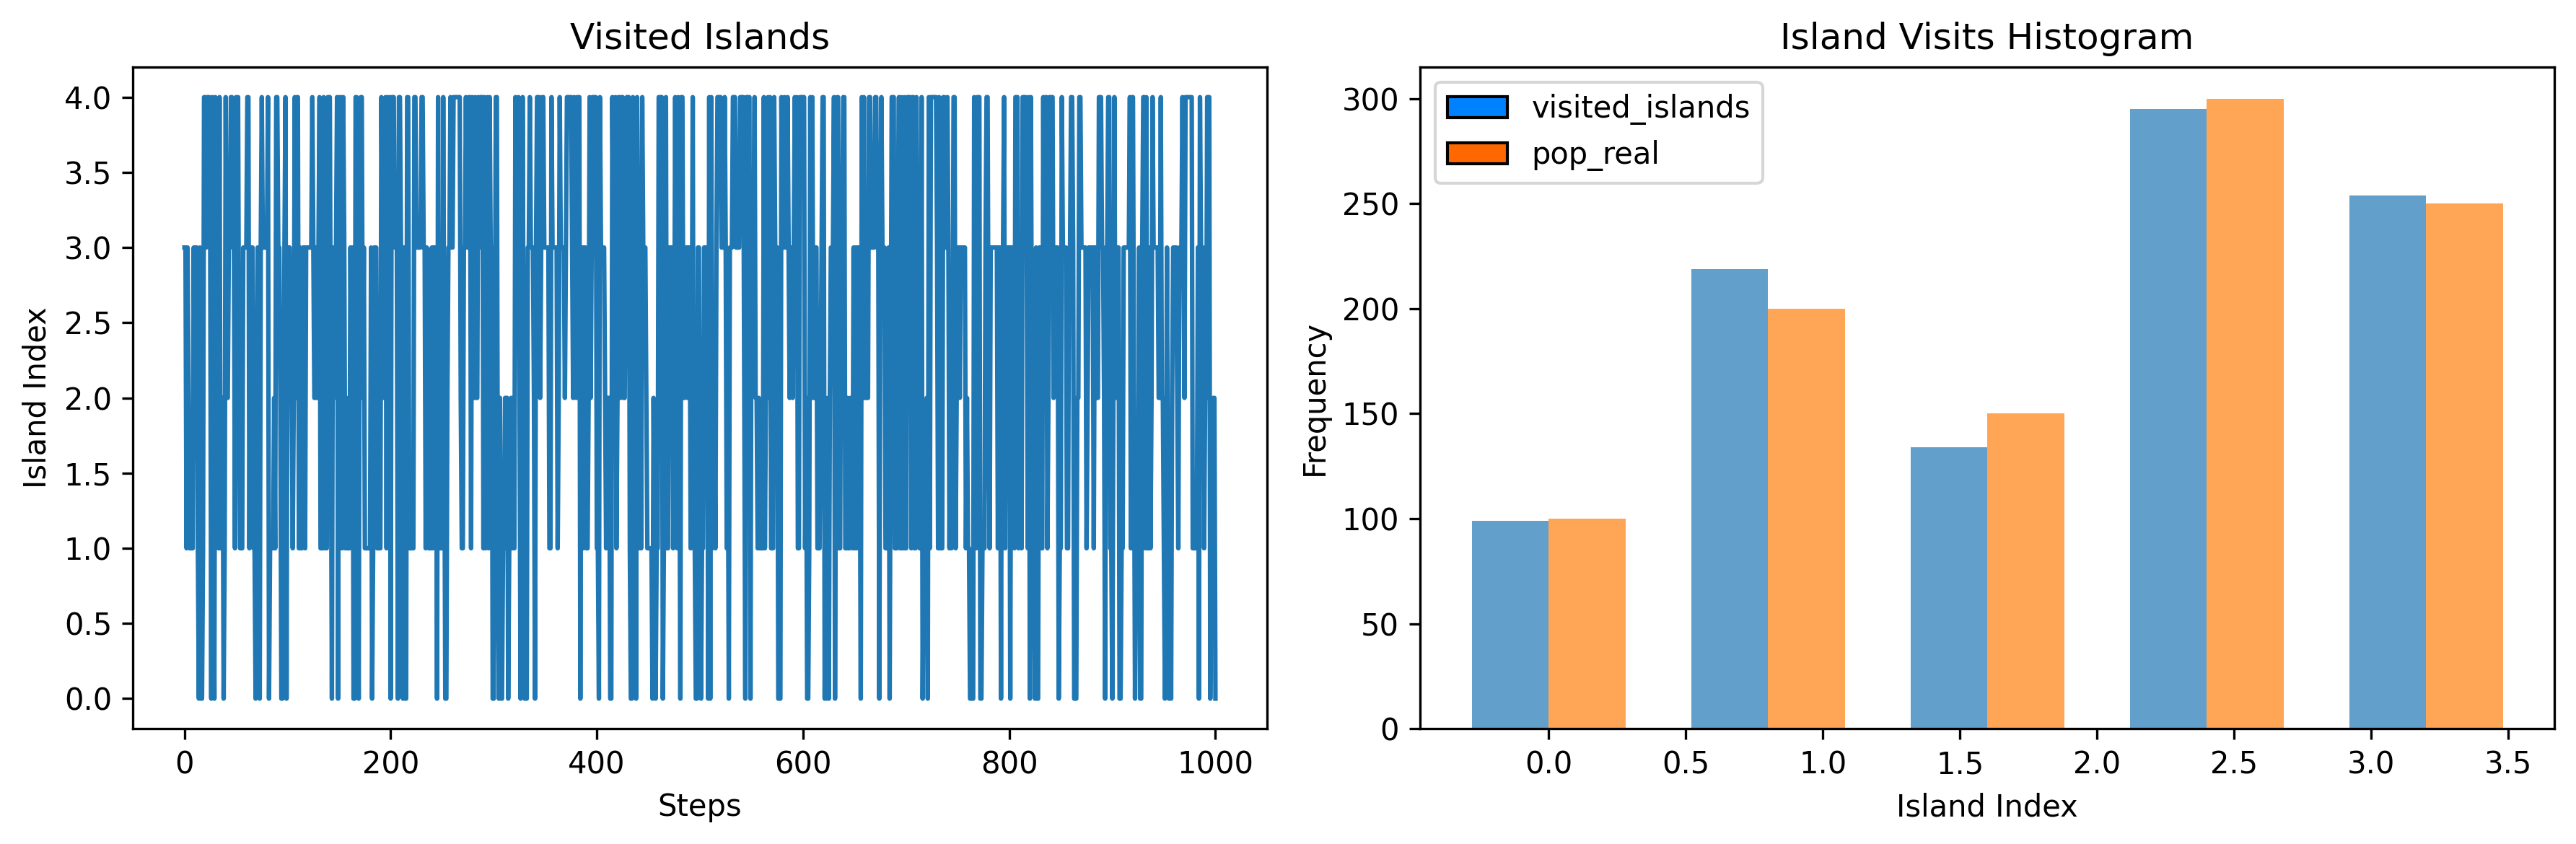

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.rcParams['figure.dpi'] = 300

# Данные: численность населения на островах
population = np.array([100, 200, 150, 300, 250])
pop_real = [0] * 100 + [1] * 200 + [2] * 150 + [3] * 300 + [4] * 250

# Начальное состояние: случайный выбор острова
current_state = np.random.choice(len(population))

# Число шагов в алгоритме
num_steps = np.sum(population)

# Список для сохранения посещенных островов
visited_islands = [current_state]

# Алгоритм Метрополиса
for _ in range(num_steps):
    # Предложение нового состояния (случайный выбор соседнего острова)
    proposed_state = np.random.choice(len(population))
    
    # Оценка отношения вероятностей текущего и предложенного состояний
    acceptance_ratio = population[proposed_state] / population[current_state]
    
    # Принятие или отклонение предложенного состояния
    if np.random.rand() < acceptance_ratio:
        current_state = proposed_state
    
    # Сохранение посещенных островов
    visited_islands.append(current_state)

# Визуализация результатов
plt.figure(figsize=(12, 4))

# График посещенных островов
plt.subplot(1, 2, 1)
plt.plot(visited_islands)
plt.title('Visited Islands')
plt.xlabel('Steps')
plt.ylabel('Island Index')

# Гистограмма посещений островов
plt.subplot(1, 2, 2)
plt.hist([visited_islands, pop_real], bins=len(population), align='left', rwidth=0.7, alpha=0.7)

#create legend
cmap = plt.get_cmap('jet')
low = cmap(0.25)
high = cmap(0.8)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,high]]
labels= ["visited_islands","pop_real"]
plt.legend(handles, labels)
plt.title('Island Visits Histogram')
plt.xlabel('Island Index')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [56]:
import numpy as np
import pandas as pd

from scipy import stats 

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

import pymc3 as pm

In [57]:
y = stats.bernoulli(p=0.3).rvs(100)
print('Доля карасей в выборке:', y.mean())
y

Доля карасей в выборке: 0.22


array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

Задаём нашу модель и априорное распределение. 

In [58]:
basic_model = pm.Model()

with basic_model:
    p = pm.Uniform(name="karases_prop", lower=0, upper=1)   # априорное распределение для доли 
    y_obs = pm.Bernoulli(name='y_obs', p = p, observed=y)   # модель

Байесовские методы для бедных: находим оценку моды апостериорного распределения. Её можно использовать в качестве точечной байесовской оценки. Когда мы не можем найти знаменатель в формуле Байеса, единственное, что нам остаётся - посчитать моду. 

In [59]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

{'karases_prop_interval__': array(-1.26566632),
 'karases_prop': array(0.22000001)}

In [60]:
with basic_model:
    trace = pm.sample(500, return_inferencedata=False, model=basic_model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [karases_prop]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 2 seconds.


In [61]:
# Последние 5 значений в выборке
trace["karases_prop"][-5:]

array([0.21723797, 0.28312929, 0.23079286, 0.24852833, 0.24120257])

In [62]:
# размер выборки
trace["karases_prop"].shape

(2000,)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


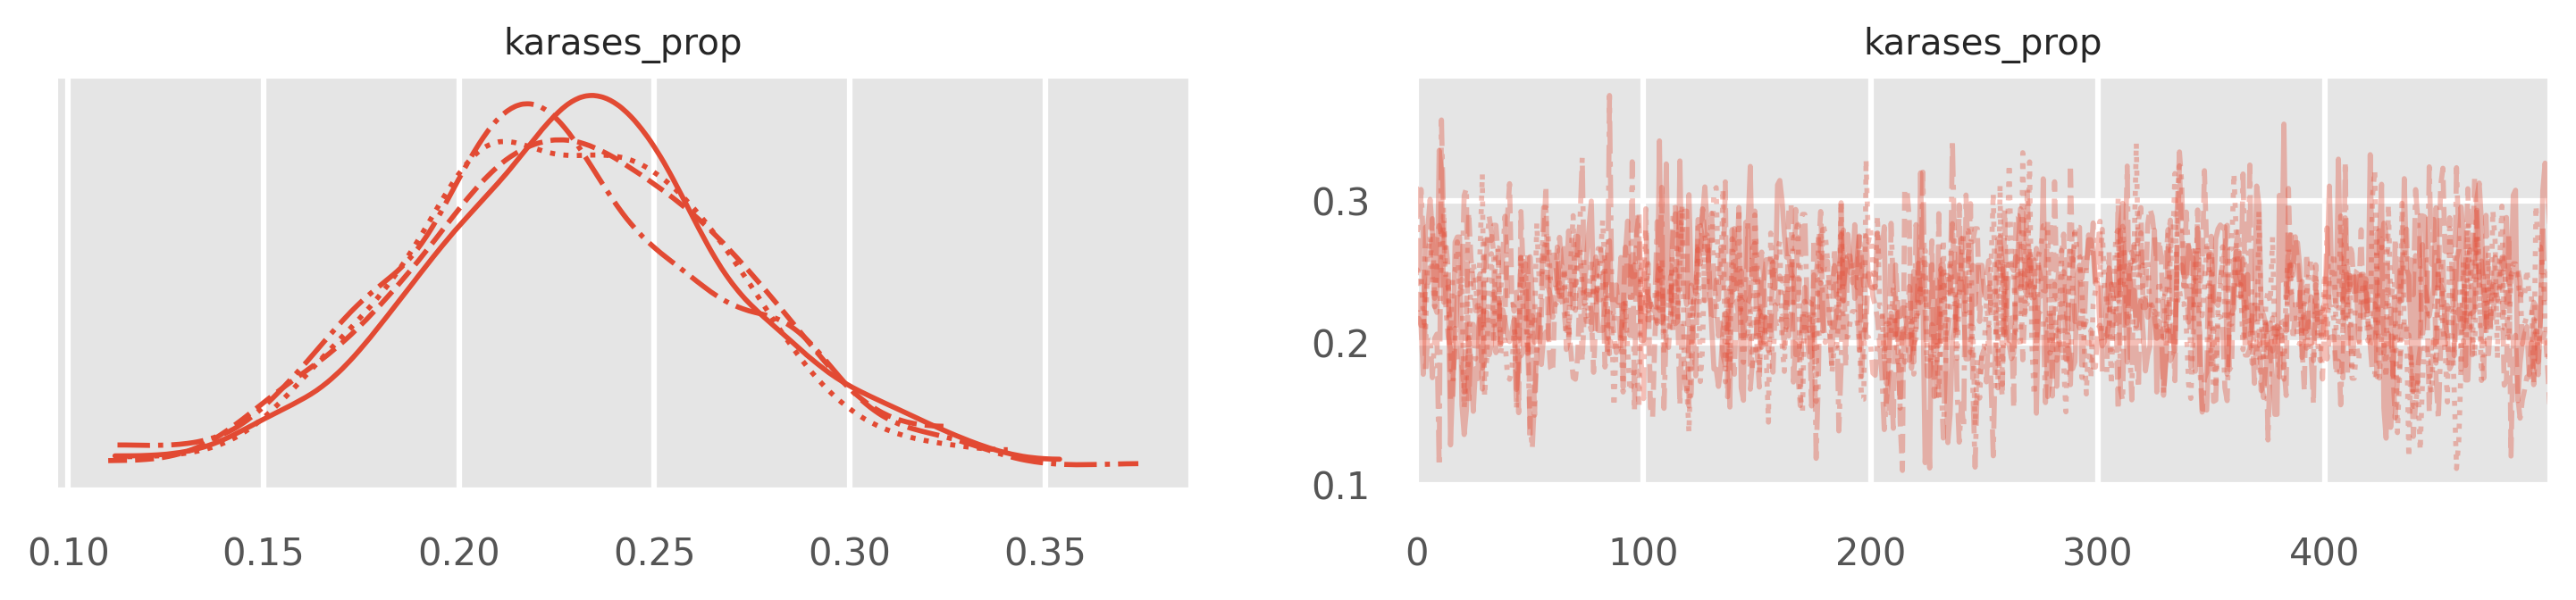

In [63]:
import arviz as az
az.plot_trace(trace)

Алгоритм запустится $4$ раза. Слева будут отрисованы апостериорные распределения (сглаженные и отнормированные гистограммы для апостериорных выборок, полученныех в результате MCMC). Справа будет график истории марковской цепи. Анализируя ее, можно понять, насколько хорошо отработал алгоритм и требует ли он дополнительной настройки. Визуальными критериями качества являются:

- Стационарность. Сэмплы должны образовывать шум вогруг какого-то значения.
- Не имеют сильно выраженной автокорреляции.
- Вся история не может стостоять из одной и той же повторяющейся точки. Если какая-то переменная оставалась константой, то скорее всего что-то пошло не так.

Понятное дело, что итерации, указанные нами в опциях алгоритма для прогрева не входят в итоговую выборку.

In [64]:
az.summary(trace, round_to=2)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
karases_prop,0.23,0.04,0.15,0.3,0.0,0.0,867.53,1126.14,1.0


Обратите внимание на колонку `r_hat`. Грубо говоря, это отношение дисперсий между цепями к десперсии внутри цепей. Это значение должно быть близко к $1$, иначе разные цепи ведут себя не одинаково и с алгоритмом есть проблемы. 

### Априорное распределение (Prior Distribution):

### Априорное распределение - это вероятностное распределение, которое представляет собой наше предварительное мнение или знание о параметрах модели, прежде чем у нас появятся наблюдения данных. Априорные распределения могут отражать наши убеждения, интуиции или предыдущий опыт относительно параметров.

### Пример априорного распределения можно показать на графике. Рассмотрим априорное распределение для параметра p в бета-распределении с параметрами alpha=2 и beta=2:

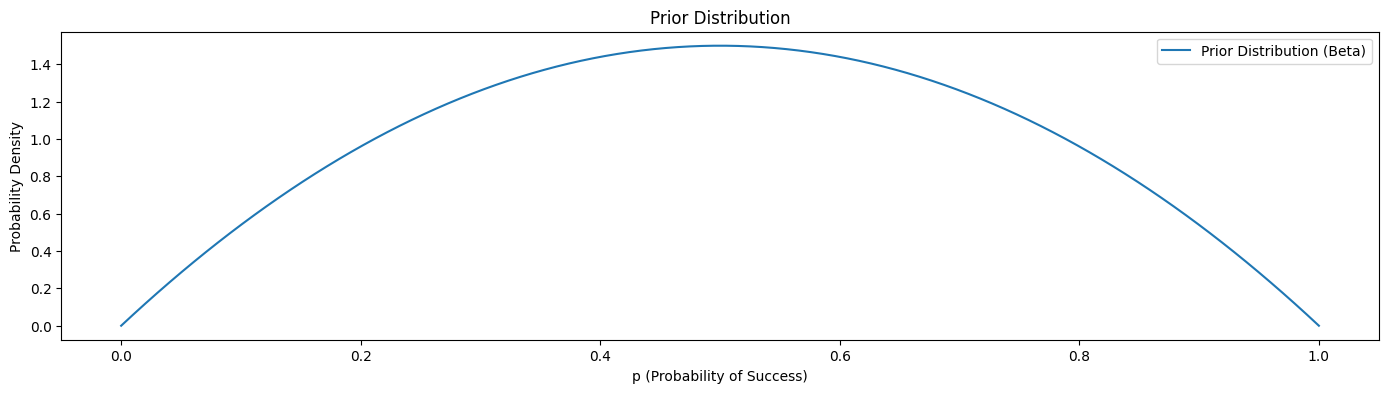

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

alpha = 2
beta = 2

x = np.linspace(0, 1, 100)
prior_distribution = stats.beta.pdf(x, alpha, beta)

plt.plot(x, prior_distribution, label='Prior Distribution (Beta)')
plt.title('Prior Distribution')
plt.xlabel('p (Probability of Success)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


### Апостериорное распределение (Posterior Distribution):

### Апостериорное распределение - это вероятностное распределение параметров модели после того, как мы учли новые данные. Оно представляет собой комбинацию наших априорных знаний и информации, полученной из данных.

### Пример апостериорного распределения можно показать на графике. Рассмотрим апостериорное распределение для параметра p в бета-распределении с учетом некоторых наблюдений данных:

/home/maxim/self/study/opengl-opencv-timeseries/venv/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/maxim/self/study/opengl-opencv-timeseries/venv/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


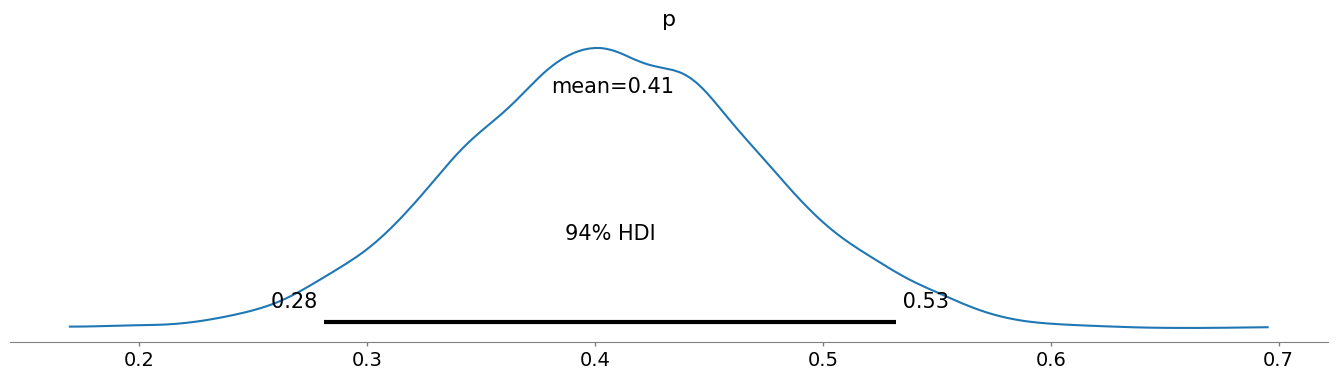

In [20]:
import pymc3 as pm
import arviz as az

# Генерация наблюдений
data = np.concatenate([np.ones(20), np.zeros(30)])

# Определение модели
with pm.Model() as model:
    p = pm.Beta('p', alpha=2, beta=2)
    likelihood = pm.Bernoulli('likelihood', p, observed=data)

    # Семплирование из постериорного распределения
    trace = pm.sample(1000, tune=1000)

# Визуализация апостериорного распределения
az.plot_posterior(trace)
plt.show()


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/maxim/self/study/opengl-opencv-timeseries/venv/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
/home/maxim/self/study/opengl-opencv-timeseries/venv/lib/python3.10/site-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
Got error No model on context stack. trying to find log_likelihood in translation.
/home/maxim/self/study/opengl-opencv-timeseries/venv/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the 

<Axes: title={'center': 'p'}>

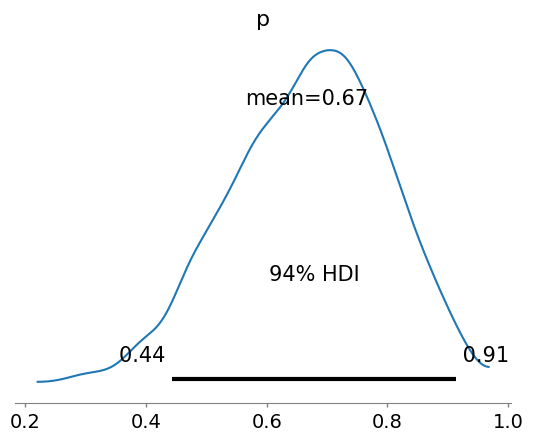

In [3]:
import pymc3 as pm

# Наблюдаемые данные
data = [0, 1, 1, 0, 1, 1, 1, 0, 1, 1]

# Определение модели
with pm.Model() as model:
    p = pm.Beta('p', alpha=1, beta=1)
    observed = pm.Bernoulli('observed', p, observed=data)

# Семплирование из постериорного распределения
with model:
    trace = pm.sample(1000, tune=1000)

# Визуализация результатов
pm.plot_posterior(trace)

/tmp/ipykernel_947698/1673982407.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  e4 = i ** (a - 1)
/tmp/ipykernel_947698/1673982407.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return (e1/(e2*e3)) * e4 * e5


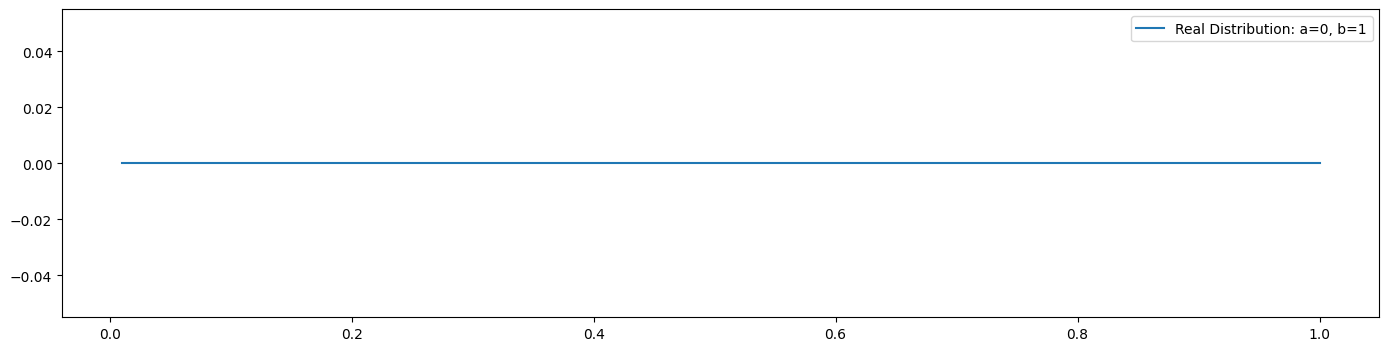

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_beta(a, b):

	Ly = []
	Lx = []

	i_list = np.mgrid[0:1:100j]

	for i in i_list:
		Lx.append(i)
		Ly.append(beta(a, b, i))

	pl.plot(Lx, np.array(Ly) * 1.0/len(Ly) * 4, label="Real Distribution: a="+str(a)+", b="+str(b))
	pl.legend()
	pl.show()

plot_beta(0,1)